# ***Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Library***

In [ ]:
import numpy as np
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import preprocessing, linear_model
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

# ***Labels***

In [ ]:
class_names = ['flagpole', 'gasmask', 'gondola', 'hourglass', 'lampshade']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

# ***Load Data***

In [ ]:
def load_data():
    datasets = ['/content/drive/MyDrive/CSE428/Project/Data/train', '/content/drive/MyDrive/CSE428/Project/Data/test']
    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

Loading /content/drive/MyDrive/CSE428/Project/Data/train


100%|██████████| 500/500 [00:09<00:00, 53.33it/s] 


Loading /content/drive/MyDrive/CSE428/Project/Data/test


100%|██████████| 50/50 [00:28<00:00,  1.75it/s]


In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state=25)

# ***Visual Plots***

In [ ]:
n_train = y_train.shape[0]
n_test = y_test.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))
num_classes = len(class_names)
print(f"Number of Classes: {num_classes}")

Number of training examples: 2150
Number of testing examples: 250
Each image is of size: (64, 64)
Number of Classes: 5


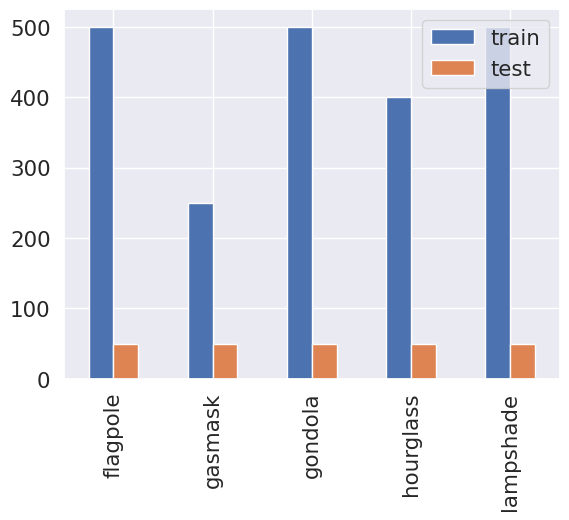

In [ ]:
import pandas as pd

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

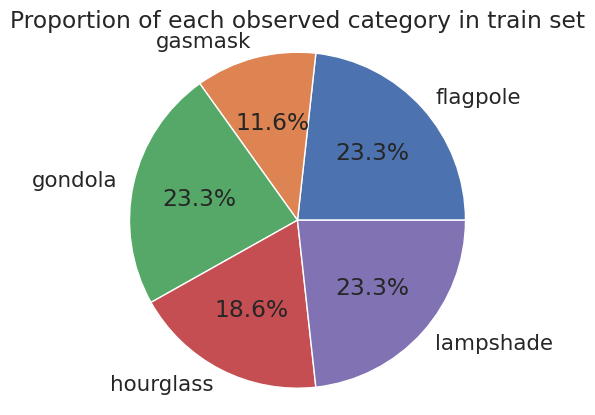

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category in train set')
plt.show()

# ***Normalization***

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# ***Image Visualization***

In [ ]:
def display_random_image(class_names, images, labels):

    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image {} : '.format(index) + class_names[labels[index]])
    plt.show()

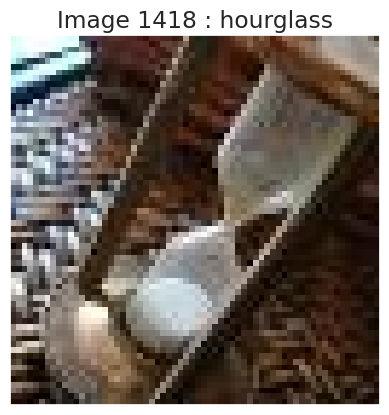

In [ ]:
display_random_image(class_names, x_train, y_train)

In [ ]:
def display_examples(class_names, images, labels):

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

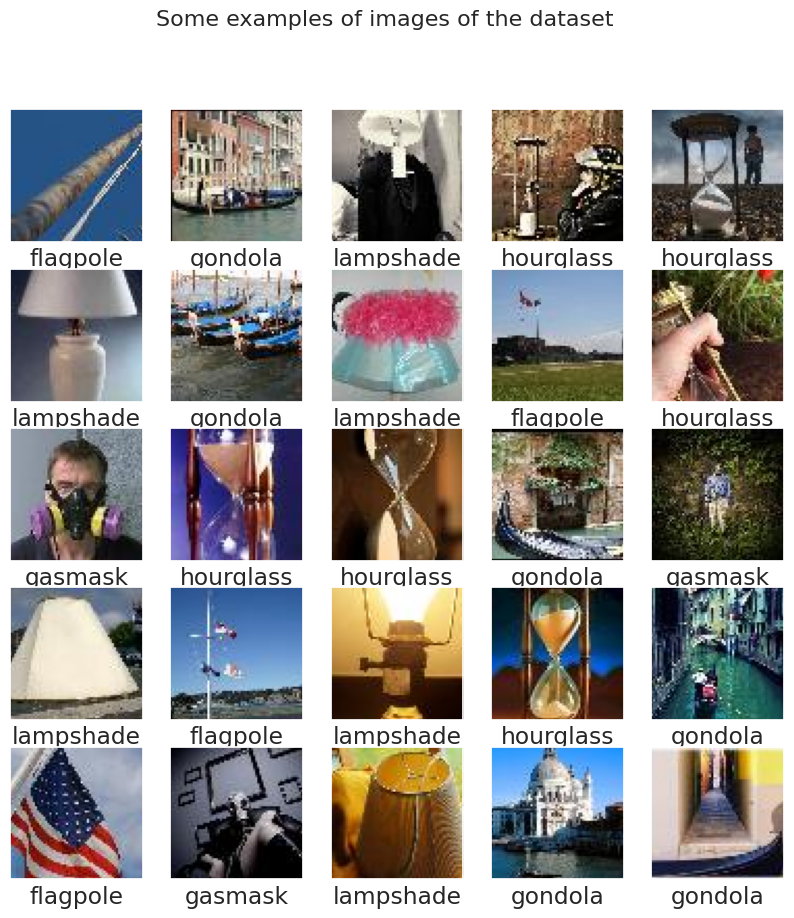

In [ ]:
display_examples(class_names, x_train, y_train)

# ***Flatten***

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# ***Linear***

In [ ]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=3000)
model = model.fit(x_train, y_train)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
acc_training = np.mean(y_train == model.predict(x_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 100.0
Testing accuracy (%) = 45.6


In [ ]:
print("Regression Model With 3000 Iteration:")
report = classification_report(y_test, y_predict, target_names=class_names)
print(report)

Regression Model With 3000 Iteration:
              precision    recall  f1-score   support

    flagpole       0.60      0.76      0.67        50
     gasmask       0.48      0.22      0.30        50
     gondola       0.46      0.38      0.42        50
   hourglass       0.31      0.36      0.33        50
   lampshade       0.43      0.56      0.49        50

    accuracy                           0.46       250
   macro avg       0.46      0.46      0.44       250
weighted avg       0.46      0.46      0.44       250



In [ ]:
# Generate a confusion matrix for test data
test_confusion = confusion_matrix(y_test, y_predict)
print("Confusion Matrix for Test Data using Logistic Regression:")
print(test_confusion)

Confusion Matrix for Test Data using Logistic Regression:
[[38  1  6  3  2]
 [ 3 11 10 11 15]
 [11  4 19 10  6]
 [ 9  4  5 18 14]
 [ 2  3  1 16 28]]


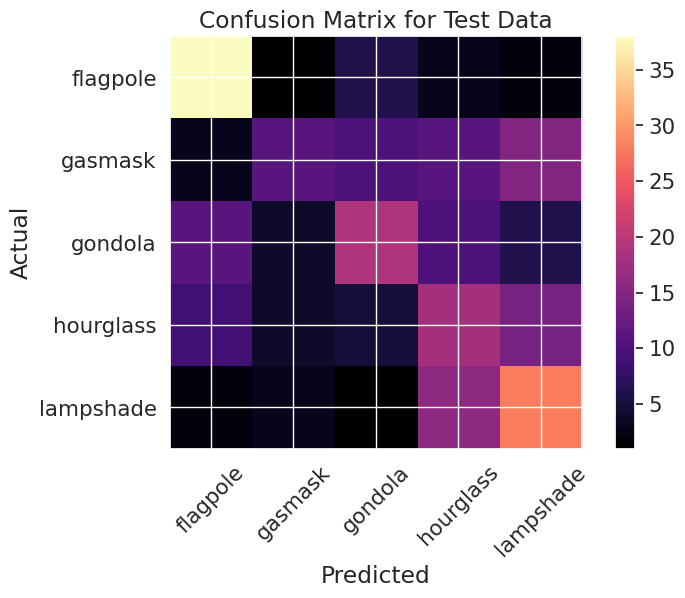

In [ ]:
# Plot the confusion matrix for test data
plt.figure(figsize=(8, 6))
plt.imshow(test_confusion, interpolation='nearest', cmap=plt.cm.magma)
plt.title("Confusion Matrix for Test Data")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

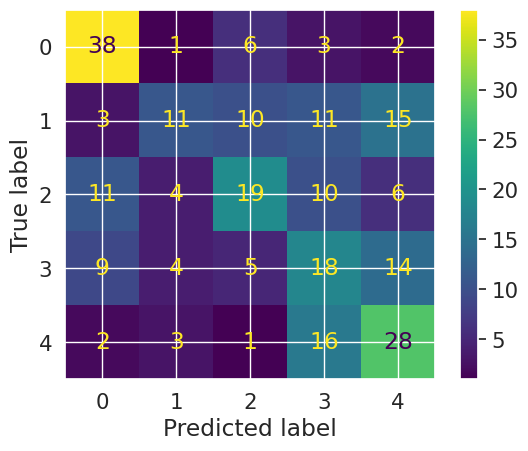

In [ ]:
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

# ***Early Stopping***

In [ ]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', verbose=1, patience=3)

# ***Neural Network***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [ ]:
# Define the neural network model
model = Sequential()

# Input layer
model.add(Input(shape=(12288,)))

# Hidden layers (you can change the number of neurons as needed)
model.add(Dense(8192, activation='sigmoid'))
model.add(Dense(4096, activation='sigmoid'))
model.add(Dense(2048, activation='sigmoid'))

# Output layer
model.add(Dense(len(class_names), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

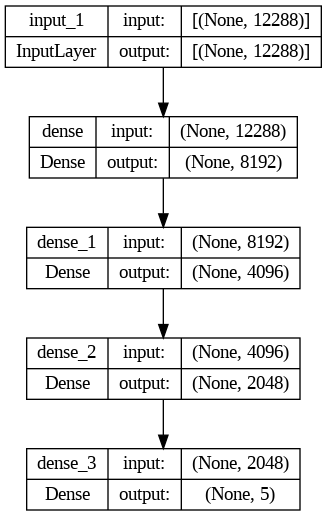

In [ ]:
plot_model(model, show_shapes=True, show_dtype=False, show_layer_names=True)

In [ ]:
# Trainning the model
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1, callbacks=[early_stopping])

Epoch 1/200
61/61 [==============================] - 8s 34ms/step - loss: 1.5163 - accuracy: 0.3752 - val_loss: 1.4044 - val_accuracy: 0.4233
Epoch 2/200
61/61 [==============================] - 2s 32ms/step - loss: 1.2494 - accuracy: 0.4956 - val_loss: 1.2519 - val_accuracy: 0.5116
Epoch 3/200
61/61 [==============================] - 2s 33ms/step - loss: 1.1281 - accuracy: 0.5411 - val_loss: 1.1499 - val_accuracy: 0.5163
Epoch 4/200
61/61 [==============================] - 2s 31ms/step - loss: 1.0732 - accuracy: 0.5742 - val_loss: 1.1523 - val_accuracy: 0.5256
Epoch 5/200
61/61 [==============================] - 2s 30ms/step - loss: 1.0580 - accuracy: 0.5762 - val_loss: 1.1366 - val_accuracy: 0.5535
Epoch 6/200
61/61 [==============================] - 2s 31ms/step - loss: 0.9969 - accuracy: 0.6119 - val_loss: 1.0985 - val_accuracy: 0.5628
Epoch 7/200
61/61 [==============================] - 2s 30ms/step - loss: 0.9745 - accuracy: 0.6196 - val_loss: 1.0795 - val_accuracy: 0.5860
Epoch 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

8/8 [==============================] - 0s 7ms/step - loss: 2.2893 - accuracy: 0.5160
Test Accuracy: 0.515999972820282


In [ ]:
# Predict labels on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

8/8 [==============================] - 0s 5ms/step


In [ ]:
# Generate a classification report
print("Neural Model With Sigmoid:")
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)
print(report)

Neural Model With Sigmoid:
              precision    recall  f1-score   support

    flagpole       0.81      0.78      0.80        50
     gasmask       0.40      0.56      0.47        50
     gondola       0.81      0.26      0.39        50
   hourglass       0.36      0.40      0.38        50
   lampshade       0.48      0.58      0.53        50

    accuracy                           0.52       250
   macro avg       0.57      0.52      0.51       250
weighted avg       0.57      0.52      0.51       250



In [ ]:
# Generate a confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix for Test Data using Neural Networks:")
print(confusion)

Confusion Matrix for Test Data using Neural Networks:
[[39  5  2  2  2]
 [ 0 28  0 17  5]
 [ 9 14 13  4 10]
 [ 0 16  0 20 14]
 [ 0  7  1 13 29]]


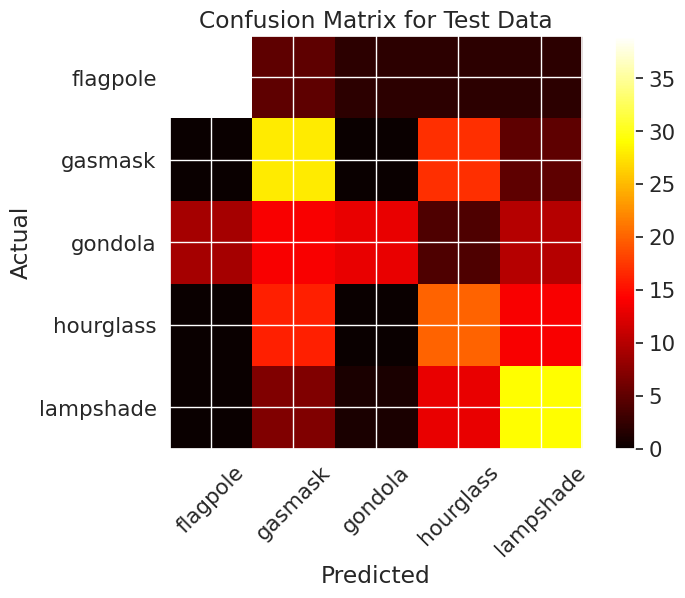

In [ ]:
# Plot the confusion matrix for test data
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.hot)
plt.title("Confusion Matrix for Test Data")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

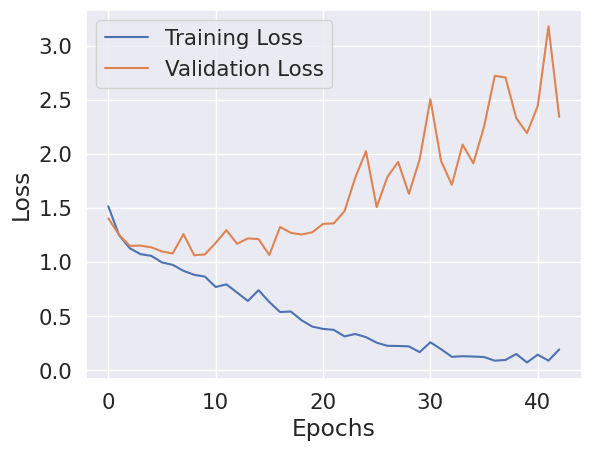

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()